# K Means Clustering Toy Problem

In [2]:
#One of the disadvantage of hierarchical clustering is that you cant run it for large datasets
#since it calculates all possible distances, it is limited by memory constraints

In [1]:
# needed imports
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage #this will be useful for heirarchical Clusters
import numpy as np
%matplotlib inline
np.set_printoptions(precision=5, suppress=True)  # suppress scientific float notation

# Generate Toy Data

(20L, 2L)


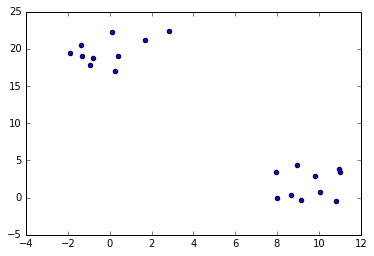

In [2]:
# generate two clusters: a with 10 points, b with 10:
np.random.seed(1)  # for repeatability of this tutorial
a = np.random.multivariate_normal([10, 0], [[3, 1], [1, 4]], size=[10,])
b = np.random.multivariate_normal([0, 20], [[3, 1], [1, 4]], size=[10,])
#The multivariate normal is a generalization of the one-dimensional normal distribution to higher
#dimensions.  Such a distribution is specified by its mean and covariance matrix. 
#These parameters are analogous to the mean (average or "center") and variance 
#(standard deviation, or "width," squared) of the one-dimensional normal distribution.

X = np.concatenate((a, b))
print X.shape  # 20 samples with 2 dimensions
plt.scatter(X[:,0], X[:,1])
plt.show()

In [3]:
#We can clearly identify that there are 2 clusters here. 
#lets see if K Means clustering also gives us the same conclusion

# The Process

In [4]:
#The k-means algorithm searches for a pre-determined number 
#of clusters within an unlabeled multidimensional dataset
#the steps involved are-

#k-Means Algorithm: Expectation–Maximization
#1-- select k 
#2---randomly assign each data point of a  cluster
#3---Compute cluster centroid
#4---Check if all points are closer to their own cluster. If not reassign data points to their closest cluster
#5---re compute cluster centroids
#6---Repeat 4 & 5 untill no improvement

# the k measn tries to do the following--
#Total SSE= Total Within cluster SSE + Total Between Cluster SSE. #Total SSE is fixed
#K means tries to Minimize the Total Within cluster SSE by creating the clusters.

In [5]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2,n_init=20) #see explanation of  n_init in adv & disadv of k means below
kmeans.fit(X)
y_kmeans = kmeans.predict(X)
print y_kmeans

[0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1]


# Visualizing Your Clusters

In [6]:
#f you're lucky enough and your data is very low dimensional, 
#you can actually visualize the resulting clusters very easily:

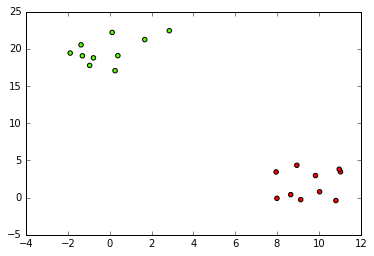

In [7]:
plt.figure(figsize=(6, 4))
plt.scatter(X[:,0], X[:,1],c=y_kmeans, cmap='prism')  # plot points with y_kmeans dependent colors
plt.show()
# so the K means did what we expected. t rightly selceted the 2 groups of points as different clusters

# Disadvantage of K means---

In [8]:
#1--The number of clusters must be selected beforehand.  For example, if we ask the 
#algorithm to identify six clusters,it will happily proceed and find the best six clusters:

#2--The globally optimal result may not be achieved.For this reason, it is common for
#the algorithm to be run for multiple starting guesses, as indeed Scikit-Learn does
#by default (set by the n_init parameter, which defaults to 10).


#3--k-means is limited to linear cluster boundaries
#The fundamental model assumptions of k-means (points will be closer to their
#own cluster center than to others) means that the algorithm will often be 
#ineffective if the clusters have complicated geometries.
#I have attached 2 images with this file. have a  look at it..

#4--k-means can be slow for large numbers of samples

# Silhoutte analysis

2163.12612513
94.3780276696
62.0101669581
30.5236898879
23.9826955996
18.092453526
14.2029926074


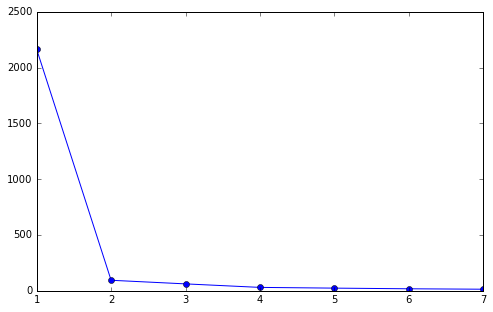

In [11]:
#The number of Clusters can be found by doing Silhoutte analysis or the Elbow Method

#We run the algorithm for different values of K(say K = 10 to 1) and 
#plot the K values against SSE(Total Sum of Squared Errors within clusters). And select the
#value of K for the elbow point as shown in the figure appears

# the k measn tries to do the following--
#Total SSE= Total Within cluster SSE + Total Between Cluster SSE. #Total SSE is fixed
#K means tries to Minimize the Total Within cluster SSE by creating the clusters.

cluster_range = range( 1, 8 )
cluster_errors = []

for i in cluster_range:
  clusters = KMeans( i )
  clusters.fit(X)
  print(clusters.inertia_)
  cluster_errors.append(clusters.inertia_)

plt.figure(figsize=(8,5))
plt.plot( cluster_range, cluster_errors, marker = "o" )

In [15]:
#this clearly gives you the elbow at cluster # 2. Hence you should select 2 clusters.